# Hypothesis testing

$H_0$ - null hypothesis. The null hypothesis is a typical statistical theory which suggests that no statistical relationship and significance exists in a set of given single observed variable, between two sets of observed data and measured phenomena. <...> It presumes to be true until evidence indicates otherwise. (from [Mineral Exploration, 2013](https://www.sciencedirect.com/science/article/pii/B978012416005700009X))
i.e. we need to prove that it's not true.

In this context the word “null” means that researchers work to nullify this hypothesis. 

## p-value

p-value is the evidence against $H_0$. Smaller p-value == stronger the evidence against (i.e. you should reject the null hypothesis).
p-values are usually expressed as decimals, althought it may be easier to understand in percents. p-value means how likely it is that the results you got could be random (i.e. the probability that the null hypothesis is true). E.x. if p-value is 0.03 (3%), you have 3% chance that results you observed are random and have nothing to do with the experiment. If p-value is 0.85 (85%), it means that there's 85% chance that results you got a random. So - smaller the p-value, the bigger chance your results are important/significant.

**p <= alpha: reject $H_0$.**

**p > alpha: failed to reject $H_0$.**

Usually the value of 0.05 (5%) is chosen as a threshold.

## (Student's) t-test (parametric)

Data requirements:
- Test variable is continuous
- Dependent variable should have an approximately normal distribution
- Observations are independent
- Sample data is random
- Homogeneity of variances (i.e. variances approximately equal in both sample and population)
- No outliers

**1. one-sample t-test - comparing mean of the given group with a known or hypothesized value.**

#### Example of One Sample t-test
(from [here](https://www.analyticsvidhya.com/blog/2019/05/statistics-t-test-introduction-r-implementation/)) - a mobile manufacturing company has taken a sample of mobiles of the same model from the previous month’s data. They want to check whether the average screen size of the sample differs from the desired length of 10 cm.

In [1]:
import pandas as pd
import math
from scipy.stats import t
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

data_file = "screen_size-data.csv"
df = pd.read_csv(data_file)

screen_sizes = df['Screen_size(in cm)']

df[:10]

,Screen_size(in cm)
0,10.006692
1,10.081624
2,10.072873
3,9.954496
4,9.994093
5,9.952208
6,9.947936
7,9.988184
8,9.993365
9,10.016660


### Normality tests

#### Visual

1. Histogram test

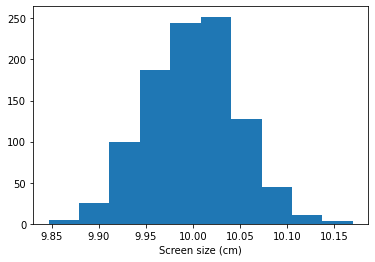

In [2]:
plt.hist(screen_sizes)
plt.xlabel('Screen size (cm)')
plt.show()

2. Quantile-Quantile Plot

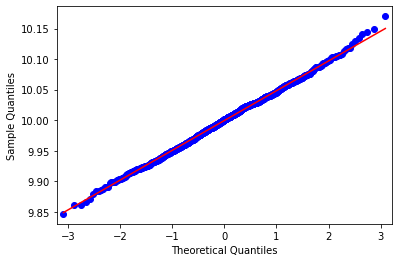

In [3]:
# quantiles of standant normal distribution vs of the given data

qqplot(screen_sizes, line = 's')
plt.show()

#### Statistical

The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or $H_0$.

3. Shapiro-Wilk Test - based on quantiles.

**NOTE** - A Shapiro-Wilk test with p > 0.05 does not mean that the variable is normally distributed, it only means that you cannot reject the null hypothesis (i.e. that variable is normally distributed). More tests are then needed.

In [4]:
stat, p = shapiro(screen_sizes)
print(stat)
print(p)

0.9987638592720032
0.7312319874763489


4. D’Agostino’s K^2 Test

In [5]:
# 

5. Anderson-Darling Test

In [6]:
#

#### t-test 

In [7]:
# H_0 - mean screen size is 10cm
# H_a - mean screen size is not equal to 10cm

theoretical_value = 10
n = df.shape[0]
mean = screen_sizes.mean(axis=0)
std = screen_sizes.std() # math.sqrt(sum([(x-mean)**2 for x in screen_sizes])/(n-1))

df = n-1
alpha = 0.05
t_stat = (mean - theoretical_value)/(std/math.sqrt(n))
t_critical = t.ppf(alpha/2, df) # alpha/2 because it is two-tailed test

p = (1 - t.cdf(abs(t_stat), df)) * 2
print(p)

print(p < alpha) # if true we reject H_0

0.692571985791246
False


#### Independent Two-Sample t-test example

**2. For comparing means of two different samples.**

$t = \frac{m_A-m_B}{\sqrt{\frac{s^2}{n_A}+\frac{s^2}{n_B}}}$

where $m_A$ - mean of the group A, $m_B$ - mean of the group B, $n_A$ - number of sampples in group A, $n_B$ - # of samples in group B, $s^2$ - **estimator of the common variance of two samples (pooled variance)**.

$s^2=\frac{\sum(x-m_A)^2+\sum(x-m_B)^2}{(n_A-1) + (n_B-1)}$

$(n_A-1) + (n_B-1) = (n_A+n_B-2)$ - degrees of freedom.

In [8]:
data_file_2s = "ind.csv"
df_2s = pd.read_csv(data_file_2s)

screen_sizes1 = df_2s['screensize_sample1']
screen_sizes2 = df_2s['screensize_sample2']

df_2s[:10]

,screensize_sample1,screensize_sample2
0,9.995571,10.018528
1,9.989146,9.973087
2,10.019307,10.027963
3,10.047096,9.964532
4,9.958848,10.063205
5,9.949121,10.020565
6,10.060778,9.995917
7,9.922951,10.001295
8,9.943103,9.932117
9,10.096234,9.967647


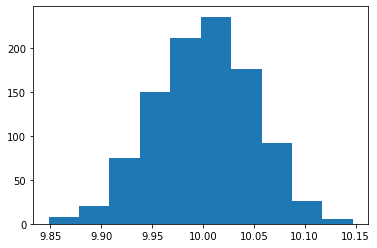

In [9]:
plt.hist(screen_sizes1)
plt.show()

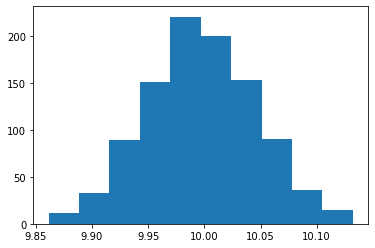

In [10]:
plt.hist(screen_sizes2)
plt.show()

In [23]:
# H_0 - there's no difference between screens' sizes

m_1 = screen_sizes1.mean()
m_2 = screen_sizes2.mean()

var_1 = screen_sizes1.var()
var_2 = screen_sizes2.var()
print(var_1)
print(var_2)

n_1 = screen_sizes1.size
n_2 = screen_sizes2.size

# since samples's are of the same size (n_1 == n_2) pooled variance is mean of the variances
pooled_variance =  (var_1 + var_2)/2

t_stat_2s = (m_1 - m_2)/(math.sqrt(2*pooled_variance/screen_sizes2.size))

df_2s = n_1+n_2-2
t_critical_2s = t.ppf(alpha/2, df_2s)

p_2s = (1 - t.cdf(abs(t_stat_2s), df_2s)) * 2

if p_2s < alpha:
    print(f'H_0 rejected, t-critical = {t_critical_2s}, t-value = {t_stat_2s}, p = {p_2s}')
else:
    print(f'Failed to reject H_0, t-critical = {t_critical_2s}, t-value = {t_stat_2s}, p = {p_2s}')

0.002382830036427738
0.0023535852370879687
Failed to reject H_0, t-critical = -1.961152014836706, t-value = 1.3072324788193879, p = 0.1912841837202255


In [12]:
df_paired = pd.read_csv('paired1.csv')
df_paired[:10]

,tyre_1,tyre_2
0,19849.129768,21269.833456
1,19836.808864,23076.428934
2,20750.418253,21859.519081
3,20191.545679,24227.202129
4,21131.215098,21940.674798
5,20120.140834,21313.801473
6,19726.700591,22086.812520
7,20561.694760,21859.068689
8,21289.185547,19275.006258
9,21420.557835,23060.536592


In [13]:
tyre_1 = df_paired['tyre_1']
tyre_2 = df_paired['tyre_2']

df_paired['diff'] = tyre_2 - tyre_1
diff = df_paired['diff']

df_paired[:10]

,tyre_1,tyre_2,diff
0,19849.129768,21269.833456,1420.703688
1,19836.808864,23076.428934,3239.620071
2,20750.418253,21859.519081,1109.100828
3,20191.545679,24227.202129,4035.656450
4,21131.215098,21940.674798,809.459700
5,20120.140834,21313.801473,1193.660639
6,19726.700591,22086.812520,2360.111929
7,20561.694760,21859.068689,1297.373929
8,21289.185547,19275.006258,-2014.179289
9,21420.557835,23060.536592,1639.978757


In [20]:
x_bar = diff.mean()
var = diff.var()
n = diff.size
df_paired = n - 1

t_paired = (x_bar - 0)/(math.sqrt(var/n))

t_critical_paired = t.ppf(alpha/2, df_paired)

p_paired = (1 - t.cdf(abs(t_paired), df_paired)) * 2

if p_paired < alpha:
    print(f'H_0 rejected with t={t_paired}, p={p_paired}')
else:
    print('failed to reject H_0 with t={t_paired}, p={p_paired}')

H_0 rejected with t=5.266185631213928, p=2.121117177167342e-05


## z-test

used when:
- **population** standart deviation is known;
- proportions testing;


We also need to check that $np_0$ and $n(1−p_0)$ are both > 10 (here $n$ - sample size, $p_0$ - hypothesized population proportion). i.e. we check if the population proportions (for example, % male and % female) should both be big enough so they will be adequately represented in the sample.

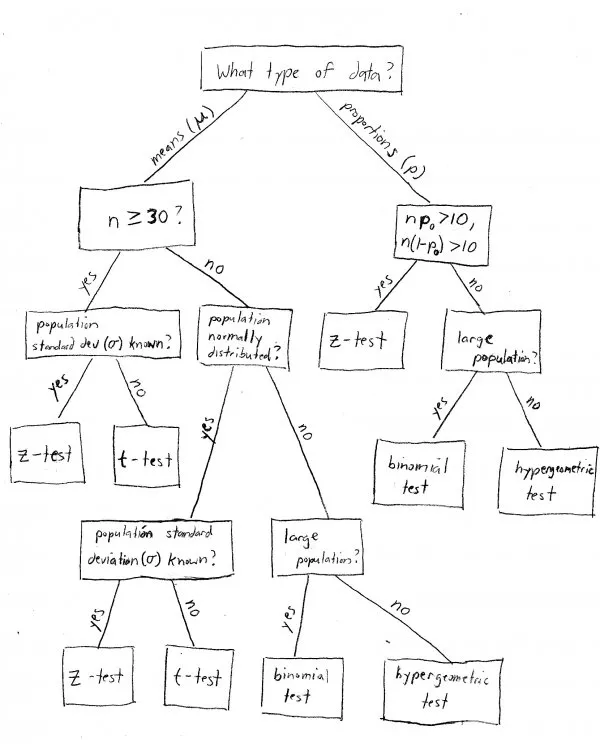

image from https://bloomingtontutors.com/blog/when-to-use-the-z-test-versus-t-test#:~:text=Proportion%20problems%20are%20never%20t,is%20your%20hypothesized%20population%20proportion.

**z-distribution** - the standard normal distribution (i.e. normal distr. with mean 0 and standard deviation 1, N~(0,1)).

**z-score** - tells us how many standard deviations from the mean value lies.

For proportions:
$\\$
single sample:
$z=\frac{\hat{p}-p_0}{\sigma}=\frac{\hat{p}-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$

$\hat{p}$ - sample proportion,
$n$ - sample size,
$p_0$ - null hypothesis value,
$\sigma$ - standart deviation.

**NOTE** - $p_0(1-p_0)$ is the variance of proportion.

two population:
$z=\frac{\hat{p_1}-\hat{p_2}}{\sigma}=\frac{\hat{p_1}-\hat{p_2}}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_1}+\frac{1}{n_2})}}$

$\hat{p_1}$ - first sample proportion,
$\hat{p_2}$ - second sample proportion,
$\hat{p}$ - overall sample proportion,
$n_1$ - first sample size,
$n_2$ - second sample size,
$\sigma$ - standart deviation.